In [1]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
import pandas as pd
import keras
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout
from tqdm import tqdm
import glob
import os

In [2]:
# path of all csv files
csv_files = glob.glob(os.getcwd()+"*/*.csv")

In [3]:
len(csv_files)

169

In [4]:
from sklearn.model_selection import train_test_split

def datagen(paths, labels_to_pick, test_size=0.2):
    label_encoder = LabelEncoder()
    scaler = StandardScaler()

    for path in paths:
        df = pd.read_csv(path)

        # Filter rows based on the labels you want to pick
        df = df[df['label'].isin(labels_to_pick)]

        # Labels and features extraction
        labels = df['label']
        features = df.iloc[:,:-1]

        # Split the data into training and test sets
        X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=test_size)

        # Labels and features pre-processing
        X_train = scaler.fit_transform(X_train)
        X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
        y_train = label_encoder.fit_transform(y_train)
        y_train = to_categorical(y_train)

        X_test = scaler.transform(X_test)
        X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
        y_test = label_encoder.transform(y_test)
        y_test = to_categorical(y_test)


        yield (X_train, y_train), (X_test, y_test)

# Define the list of class labels you want to pick

labels_to_pick = {
    'DDoS-ICMP_Flood': 'DDoS',
    'DDoS-UDP_Flood': 'DDoS',
    'DDoS-TCP_Flood': 'DDoS',
    'DDoS-PSHACK_Flood': 'DDoS',
    'DDoS-SYN_Flood': 'DDoS',
    'DDoS-RSTFINFlood': 'DDoS',
    'DDoS-SynonymousIP_Flood': 'DDoS',
    'DDoS-UDP_Fragmentation': 'DDoS',
    'DDoS-ACK_Fragmentation': 'DDoS',
    'DDoS-ICMP_Fragmentation': 'DDoS',
    'DDoS-HTTP_Flood': 'DDoS',
    'DDoS-SlowLoris': 'DDoS',

    'DoS-UDP_Flood' : 'DoS',
    'DoS-TCP_Flood' : 'DoS',
    'DoS-SYN_Flood' : 'DoS',
    'DoS-HTTP_Flood': 'DoS'
}

In [5]:
# Create the dataloader object
dataloader = datagen(csv_files, labels_to_pick)

In [6]:
from keras.layers import Dense, Dropout

model = keras.Sequential()

model.add(Dense(512, activation='relu', input_shape = (46, )))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))

model.add(Dense(16, activation='softmax'))

In [7]:
# compile your model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Train your model on each file individually
batch_size = 20

for i in tqdm(range(0, len(csv_files), batch_size)):
    print(f"Training Started on file number {i} to {i + batch_size - 1}")
    try:
        (X_train, y_train), (X_test, y_test) = next(iter(dataloader))
    except:
        pass
    history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test))

    # After training, make predictions on the test set
    y_pred = model.predict(X_test)

    # Convert one-hot encoded labels back to class labels
    y_true = np.argmax(y_test, axis=1)
    y_pred = np.argmax(y_pred, axis=1)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

Training Started on file number 0 to 19
Epoch 1/20
1345/1345 [==============================] - 14s 9ms/step - loss: 0.2912 - accuracy: 0.8983 - val_loss: 0.0505 - val_accuracy: 0.9895
Epoch 2/20
1345/1345 [==============================] - 10s 8ms/step - loss: 0.0532 - accuracy: 0.9871 - val_loss: 0.0283 - val_accuracy: 0.9899
Epoch 3/20
1345/1345 [==============================] - 11s 8ms/step - loss: 0.0327 - accuracy: 0.9908 - val_loss: 0.0206 - val_accuracy: 0.9952
Epoch 4/20
1345/1345 [==============================] - 12s 9ms/step - loss: 0.0261 - accuracy: 0.9929 - val_loss: 0.0169 - val_accuracy: 0.9957
Epoch 5/20
1345/1345 [==============================] - 13s 10ms/step - loss: 0.0226 - accuracy: 0.9936 - val_loss: 0.0148 - val_accuracy: 0.9957
Epoch 6/20
1345/1345 [==============================] - 9s 7ms/step - loss: 0.0199 - accuracy: 0.9942 - val_loss: 0.0148 - val_accuracy: 0.9958
Epoch 7/20
1345/1345 [==============================] - 12s 9ms/step - loss: 0.0189 - accu

 11%|█████████▏                                                                         | 1/9 [04:08<33:04, 248.11s/it]

Precision: 0.9964, Recall: 0.9961, F1-score: 0.9962
Training Started on file number 20 to 39
Epoch 1/20
1231/1231 [==============================] - 12s 9ms/step - loss: 0.0163 - accuracy: 0.9956 - val_loss: 0.0089 - val_accuracy: 0.9969
Epoch 2/20
1231/1231 [==============================] - 11s 9ms/step - loss: 0.0133 - accuracy: 0.9961 - val_loss: 0.0094 - val_accuracy: 0.9968
Epoch 3/20
1231/1231 [==============================] - 13s 10ms/step - loss: 0.0122 - accuracy: 0.9963 - val_loss: 0.0093 - val_accuracy: 0.9963
Epoch 4/20
1231/1231 [==============================] - 10s 8ms/step - loss: 0.0116 - accuracy: 0.9964 - val_loss: 0.0095 - val_accuracy: 0.9969
Epoch 5/20
1231/1231 [==============================] - 11s 9ms/step - loss: 0.0137 - accuracy: 0.9963 - val_loss: 0.0091 - val_accuracy: 0.9971
Epoch 6/20
1231/1231 [==============================] - 10s 8ms/step - loss: 0.0124 - accuracy: 0.9964 - val_loss: 0.0097 - val_accuracy: 0.9967
Epoch 7/20
1231/1231 [==============

 22%|██████████████████▍                                                                | 2/9 [07:56<27:35, 236.52s/it]

Precision: 0.9972, Recall: 0.9972, F1-score: 0.9972
Training Started on file number 40 to 59
Epoch 1/20
1552/1552 [==============================] - 16s 10ms/step - loss: 0.0145 - accuracy: 0.9963 - val_loss: 0.0116 - val_accuracy: 0.9968
Epoch 2/20
1552/1552 [==============================] - 14s 9ms/step - loss: 0.0134 - accuracy: 0.9965 - val_loss: 0.0307 - val_accuracy: 0.9968
Epoch 3/20
1552/1552 [==============================] - 13s 8ms/step - loss: 0.0132 - accuracy: 0.9965 - val_loss: 0.0080 - val_accuracy: 0.9972
Epoch 4/20
1552/1552 [==============================] - 10s 7ms/step - loss: 0.0121 - accuracy: 0.9966 - val_loss: 0.0090 - val_accuracy: 0.9971
Epoch 5/20
1552/1552 [==============================] - 11s 7ms/step - loss: 0.0127 - accuracy: 0.9966 - val_loss: 0.0131 - val_accuracy: 0.9966
Epoch 6/20
1552/1552 [==============================] - 11s 7ms/step - loss: 0.0125 - accuracy: 0.9964 - val_loss: 0.0091 - val_accuracy: 0.9973
Epoch 7/20
1552/1552 [==============

 33%|███████████████████████████▋                                                       | 3/9 [11:48<23:25, 234.33s/it]

Precision: 0.9970, Recall: 0.9970, F1-score: 0.9969
Training Started on file number 60 to 79
Epoch 1/20
1303/1303 [==============================] - 9s 7ms/step - loss: 0.0147 - accuracy: 0.9960 - val_loss: 0.0090 - val_accuracy: 0.9970
Epoch 2/20
1303/1303 [==============================] - 9s 7ms/step - loss: 0.0134 - accuracy: 0.9962 - val_loss: 0.0085 - val_accuracy: 0.9974
Epoch 3/20
1303/1303 [==============================] - 9s 7ms/step - loss: 0.0132 - accuracy: 0.9964 - val_loss: 0.0274 - val_accuracy: 0.9972
Epoch 4/20
1303/1303 [==============================] - 9s 7ms/step - loss: 0.0133 - accuracy: 0.9963 - val_loss: 0.0077 - val_accuracy: 0.9975
Epoch 5/20
1303/1303 [==============================] - 9s 7ms/step - loss: 0.0156 - accuracy: 0.9964 - val_loss: 0.0092 - val_accuracy: 0.9971
Epoch 6/20
1303/1303 [==============================] - 9s 7ms/step - loss: 0.0131 - accuracy: 0.9964 - val_loss: 0.0086 - val_accuracy: 0.9973
Epoch 7/20
1303/1303 [=====================

 44%|████████████████████████████████████▉                                              | 4/9 [15:36<19:18, 231.75s/it]

Precision: 0.9970, Recall: 0.9970, F1-score: 0.9970
Training Started on file number 80 to 99
Epoch 1/20
1282/1282 [==============================] - 12s 9ms/step - loss: 0.0127 - accuracy: 0.9968 - val_loss: 0.0084 - val_accuracy: 0.9971
Epoch 2/20
1282/1282 [==============================] - 12s 9ms/step - loss: 0.0139 - accuracy: 0.9965 - val_loss: 0.0110 - val_accuracy: 0.9968
Epoch 3/20
1282/1282 [==============================] - 12s 9ms/step - loss: 0.0125 - accuracy: 0.9965 - val_loss: 0.0085 - val_accuracy: 0.9970
Epoch 4/20
1282/1282 [==============================] - 12s 10ms/step - loss: 0.0141 - accuracy: 0.9965 - val_loss: 0.0087 - val_accuracy: 0.9971
Epoch 5/20
1282/1282 [==============================] - 12s 10ms/step - loss: 0.0123 - accuracy: 0.9967 - val_loss: 0.0086 - val_accuracy: 0.9972
Epoch 6/20
1282/1282 [==============================] - 11s 9ms/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0091 - val_accuracy: 0.9970
Epoch 7/20
1282/1282 [=============

 56%|██████████████████████████████████████████████                                     | 5/9 [19:36<15:40, 235.02s/it]

Precision: 0.9974, Recall: 0.9974, F1-score: 0.9974
Training Started on file number 100 to 119
Epoch 1/20
1352/1352 [==============================] - 14s 10ms/step - loss: 0.0155 - accuracy: 0.9963 - val_loss: 0.0099 - val_accuracy: 0.9967
Epoch 2/20
1352/1352 [==============================] - 14s 10ms/step - loss: 0.0173 - accuracy: 0.9961 - val_loss: 0.0102 - val_accuracy: 0.9966
Epoch 3/20
1352/1352 [==============================] - 13s 10ms/step - loss: 0.0158 - accuracy: 0.9962 - val_loss: 0.0105 - val_accuracy: 0.9962
Epoch 4/20
1352/1352 [==============================] - 12s 9ms/step - loss: 0.0127 - accuracy: 0.9962 - val_loss: 0.0088 - val_accuracy: 0.9966
Epoch 5/20
1352/1352 [==============================] - 11s 8ms/step - loss: 0.0134 - accuracy: 0.9965 - val_loss: 0.0094 - val_accuracy: 0.9966
Epoch 6/20
1352/1352 [==============================] - 12s 9ms/step - loss: 0.0127 - accuracy: 0.9962 - val_loss: 0.0106 - val_accuracy: 0.9965
Epoch 7/20
1352/1352 [==========

 67%|███████████████████████████████████████████████████████▎                           | 6/9 [24:20<12:34, 251.38s/it]

Precision: 0.9967, Recall: 0.9967, F1-score: 0.9967
Training Started on file number 120 to 139
Epoch 1/20
1318/1318 [==============================] - 11s 8ms/step - loss: 0.0149 - accuracy: 0.9961 - val_loss: 0.0114 - val_accuracy: 0.9968
Epoch 2/20
1318/1318 [==============================] - 10s 8ms/step - loss: 0.0125 - accuracy: 0.9964 - val_loss: 0.0106 - val_accuracy: 0.9967
Epoch 3/20
1318/1318 [==============================] - 10s 8ms/step - loss: 0.0140 - accuracy: 0.9962 - val_loss: 0.0114 - val_accuracy: 0.9966
Epoch 4/20
1318/1318 [==============================] - 12s 9ms/step - loss: 0.0137 - accuracy: 0.9962 - val_loss: 0.0112 - val_accuracy: 0.9965
Epoch 5/20
1318/1318 [==============================] - 15s 11ms/step - loss: 0.0144 - accuracy: 0.9962 - val_loss: 0.0105 - val_accuracy: 0.9969
Epoch 6/20
1318/1318 [==============================] - 11s 8ms/step - loss: 0.0155 - accuracy: 0.9962 - val_loss: 0.0116 - val_accuracy: 0.9969
Epoch 7/20
1318/1318 [============

 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [28:40<08:28, 254.36s/it]

Precision: 0.9973, Recall: 0.9973, F1-score: 0.9973
Training Started on file number 140 to 159
Epoch 1/20
1284/1284 [==============================] - 11s 9ms/step - loss: 0.0208 - accuracy: 0.9962 - val_loss: 0.0121 - val_accuracy: 0.9967
Epoch 2/20
1284/1284 [==============================] - 12s 9ms/step - loss: 0.0169 - accuracy: 0.9964 - val_loss: 0.0105 - val_accuracy: 0.9967
Epoch 3/20
1284/1284 [==============================] - 12s 10ms/step - loss: 0.0144 - accuracy: 0.9965 - val_loss: 0.0107 - val_accuracy: 0.9964
Epoch 4/20
1284/1284 [==============================] - 11s 9ms/step - loss: 0.0162 - accuracy: 0.9963 - val_loss: 0.0096 - val_accuracy: 0.9965
Epoch 5/20
1284/1284 [==============================] - 12s 9ms/step - loss: 0.0184 - accuracy: 0.9966 - val_loss: 0.0104 - val_accuracy: 0.9970
Epoch 6/20
1284/1284 [==============================] - 13s 10ms/step - loss: 0.0147 - accuracy: 0.9963 - val_loss: 0.0097 - val_accuracy: 0.9971
Epoch 7/20
1284/1284 [===========

 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [32:40<04:09, 249.91s/it]

Precision: 0.9963, Recall: 0.9962, F1-score: 0.9962
Training Started on file number 160 to 179
Epoch 1/20
1388/1388 [==============================] - 15s 11ms/step - loss: 0.0216 - accuracy: 0.9957 - val_loss: 0.0108 - val_accuracy: 0.9964
Epoch 2/20
1388/1388 [==============================] - 17s 12ms/step - loss: 0.0144 - accuracy: 0.9958 - val_loss: 0.0122 - val_accuracy: 0.9959
Epoch 3/20
1388/1388 [==============================] - 13s 9ms/step - loss: 0.0136 - accuracy: 0.9963 - val_loss: 0.0117 - val_accuracy: 0.9962
Epoch 4/20
1388/1388 [==============================] - 13s 9ms/step - loss: 0.0147 - accuracy: 0.9963 - val_loss: 0.0103 - val_accuracy: 0.9965
Epoch 5/20
1388/1388 [==============================] - 13s 9ms/step - loss: 0.0241 - accuracy: 0.9962 - val_loss: 0.0107 - val_accuracy: 0.9964
Epoch 6/20
1388/1388 [==============================] - 16s 11ms/step - loss: 0.0120 - accuracy: 0.9964 - val_loss: 0.0118 - val_accuracy: 0.9967
Epoch 7/20
1388/1388 [==========

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [37:18<00:00, 248.76s/it]

Precision: 0.9965, Recall: 0.9965, F1-score: 0.9965


In [9]:
# Evaluate the model on the test set

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1388/1388 [==============================] - 4s 3ms/step - loss: 0.0119 - accuracy: 0.9965
Test Loss: 0.011935454793274403
Test Accuracy: 0.9964651465415955


In [13]:
# Evaluate the model on the training set

loss, accuracy = model.evaluate(X_train, y_train)
print("Train Loss:", loss)
print("Train Accuracy:", accuracy)

5552/5552 [==============================] - 14s 3ms/step - loss: 0.0085 - accuracy: 0.9970
Train Loss: 0.00848450232297182
Train Accuracy: 0.9970279932022095


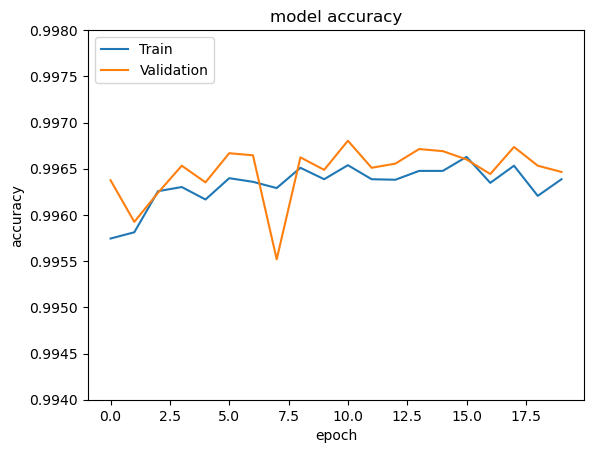

In [10]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim([0.994, 0.998]) # Set the y-axis range from 0.9 to 1.0 (90% to 100%)
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

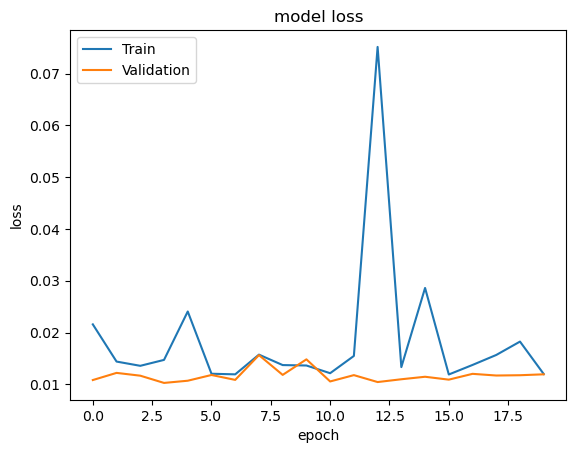

In [11]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

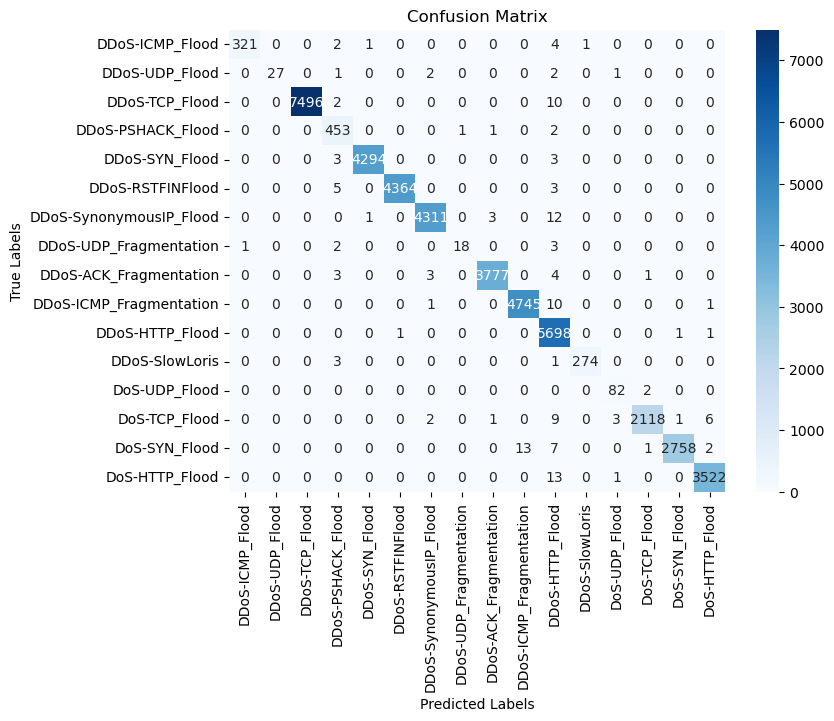

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Get the class names (replace with your actual class names)
class_names = list(labels_to_pick)  # Use the same labels as in your training data

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()